In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
import seaborn as sns
import itertools

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
pd.set_option('display.expand_frame_repr',False)

In [66]:
walmart=pd.read_csv(r'C:\Users\lenovo\Desktop\DS Projects\Walmart Project\walmart-sales-dataset-of-45stores.csv')

In [67]:
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [68]:
walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [69]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [79]:
walmart.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01
Day_Num,6435.0,1.567832e+01,8.755780,1.000,8.000,16.000000,2.300000e+01,3.100000e+01
Year,6435.0,2.010965e+03,0.797019,2010.000,2010.000,2011.000000,2.012000e+03,2.012000e+03


<Axes: >

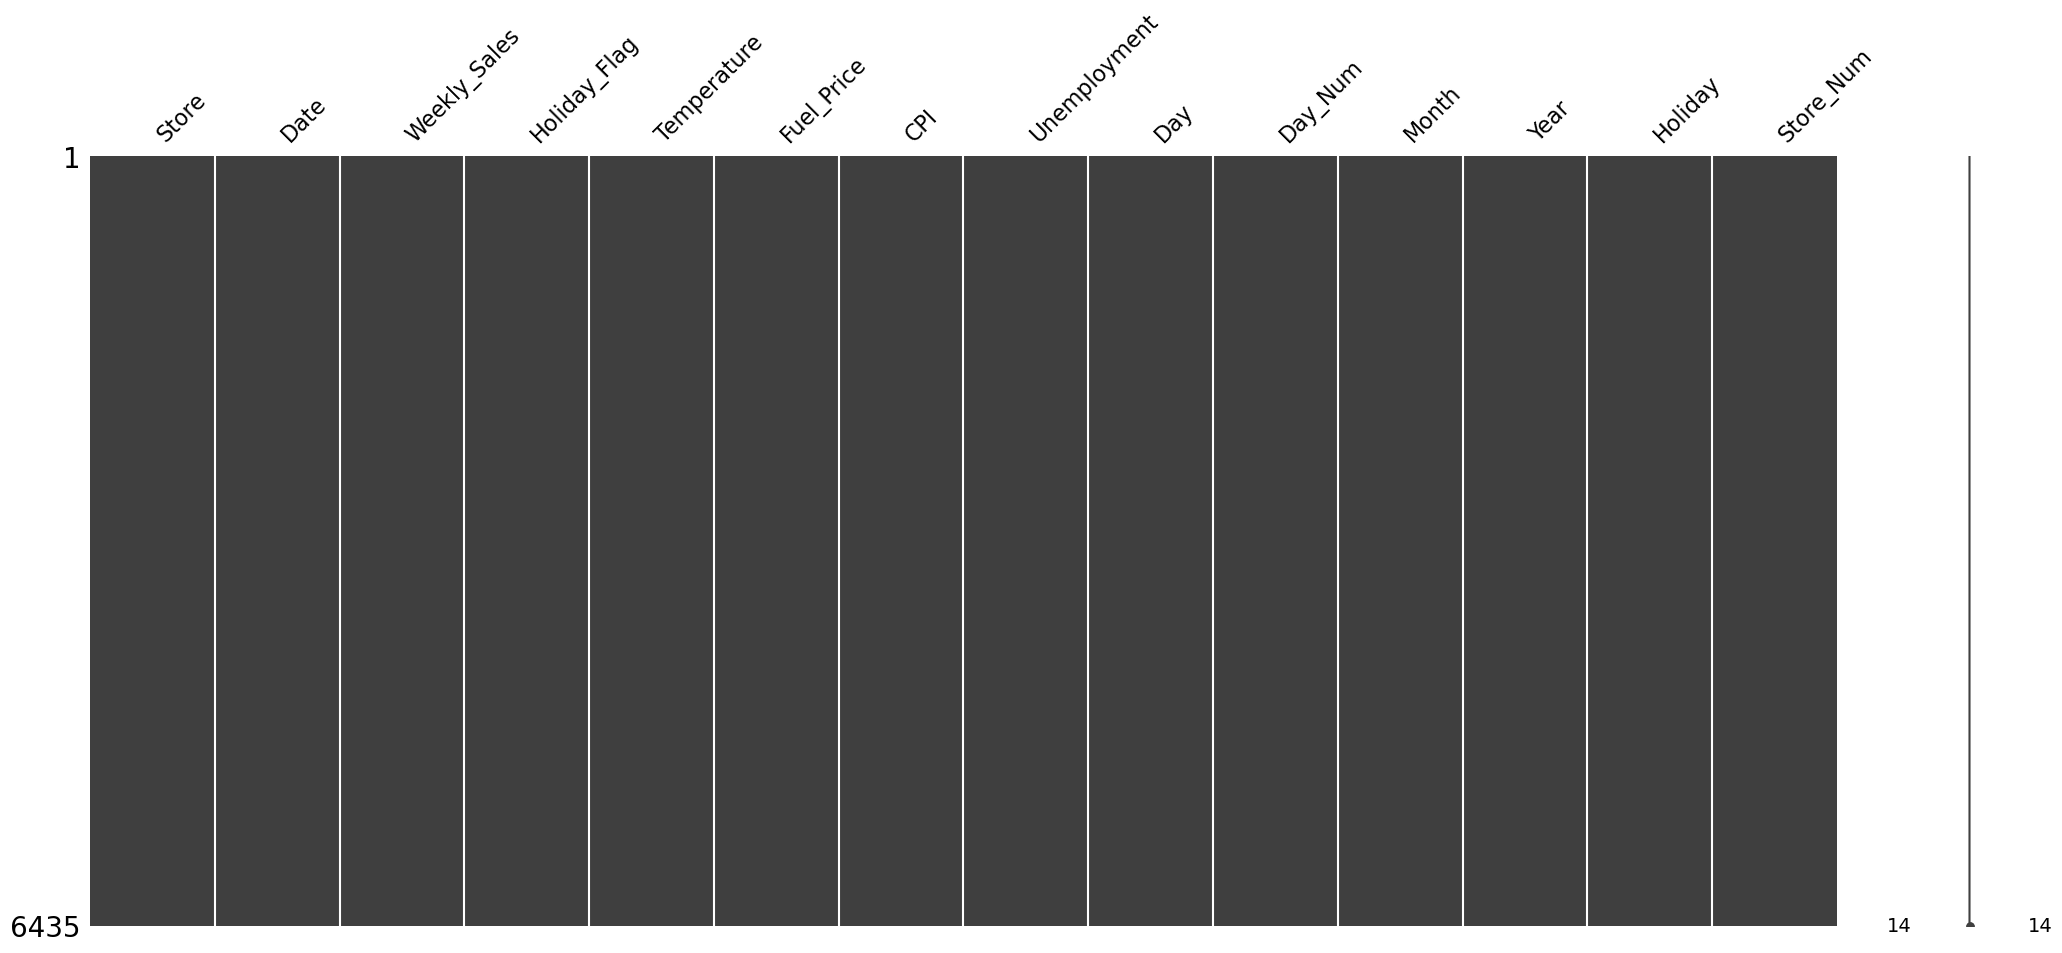

In [80]:
import missingno as mn
mn.matrix(walmart)

In [81]:
#NO NULL value
walmart['Date'] = pd.to_datetime(walmart['Date'], format = '%d-%m-%Y')
print(type(walmart['Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [82]:
walmart['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [83]:
import datetime as dt
walmart['Day']=pd.to_datetime(walmart['Date']).dt.day_name().str[:3]
walmart['Day_Num']=pd.to_datetime(walmart['Date']).dt.day
walmart['Month']=pd.to_datetime(walmart['Date']).dt.month_name().str[:3]
walmart['Year']=pd.to_datetime(walmart['Date']).dt.year

In [84]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Day_Num,Month,Year,Holiday,Store_Num
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,Fri,5,Feb,2010,no holiday,Store 1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Fri,12,Feb,2010,Super Bowl,Store 1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Fri,19,Feb,2010,no holiday,Store 1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Fri,26,Feb,2010,no holiday,Store 1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,Fri,5,Mar,2010,no holiday,Store 1


In [85]:
Super_Bowl=['2010-02-12','2011-02-11','2012-02-10']
Labour_Day=['2010-09-10','2011-09-09','2012-09-07']
Thanksgiving=['2010-11-26','2011-11-25','2012-11-23']
Christmas=['2010-12-31','2011-12-30','2012-12-28']

In [86]:
def holiday(x):
    if str(x)[:10] in Super_Bowl:
        return 'Super Bowl'
    elif str(x)[:10] in Labour_Day:
        return 'Labour Day'
    elif str(x)[:10] in Thanksgiving:
        return 'Thanksgiving'
    elif str(x)[:10] in Christmas:
        return 'Christmas'
    else:
        return 'no holiday'
walmart['Holiday'] = walmart['Date'].apply(holiday)

In [87]:
walmart['Store_Num'] = walmart['Store'].map({value: 'Store ' + str(value) for value in walmart['Store'].unique().tolist()})

In [88]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [89]:
from tqdm import tqdm

In [90]:
walmart['Season'] = ''

for X in tqdm(range(walmart.Year.min() - 1, walmart.Year.max() + 1)):
    # Spring: March 21 - June 20
    walmart.loc[(walmart.Date >= str(X) +'-03-21') & (walmart.Date <= str(X) +'-06-20'),  'Season'] = 'Spring'
    # Summer: June 21 - September 20
    walmart.loc[(walmart.Date >= str(X) +'-06-21') & (walmart.Date <= str(X) +'-09-20'),  'Season'] = 'Summer'
    # Fall: September 21 - December 20
    walmart.loc[(walmart.Date >= str(X) +'-09-21') & (walmart.Date <= str(X) +'-12-20'),  'Season'] = 'Fall'
    # Winter: December 21 - March 20
    walmart.loc[(walmart.Date >= str(X) +'-12-21') & (walmart.Date <= str(X + 1) +'-03-20'),'Season'] = 'Winter'

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 256.09it/s]


In [91]:
walmart['Season']

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
6430      Fall
6431      Fall
6432      Fall
6433      Fall
6434      Fall
Name: Season, Length: 6435, dtype: object

In [92]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Day_Num,Month,Year,Holiday,Store_Num,Season
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,Fri,5,Feb,2010,no holiday,Store 1,Winter
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Fri,12,Feb,2010,Super Bowl,Store 1,Winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Fri,19,Feb,2010,no holiday,Store 1,Winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Fri,26,Feb,2010,no holiday,Store 1,Winter
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,Fri,5,Mar,2010,no holiday,Store 1,Winter


In [93]:
walmart['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [94]:
walmart.drop(['Store', 'Holiday_Flag'], axis = 1, inplace = True)

In [95]:
walmart.columns

Index(['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Day_Num', 'Month', 'Year', 'Holiday', 'Store_Num', 'Season'], dtype='object')

In [96]:
newCols = ['Store_Num', 'Date','Day', 'Month', 'Year', 'Holiday',
           'Season', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
           ]

In [97]:
walmart = walmart[newCols]

In [98]:
walmart['Year'] = walmart['Year'].apply(lambda x: str(x))

In [99]:
walmart.head(20)

,Store_Num,Date,Day,Month,Year,Holiday,Season,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,Store 1,2010-02-05,Fri,Feb,2010,no holiday,Winter,1643690.90,42.31,2.572,211.096358,8.106
1,Store 1,2010-02-12,Fri,Feb,2010,Super Bowl,Winter,1641957.44,38.51,2.548,211.242170,8.106
2,Store 1,2010-02-19,Fri,Feb,2010,no holiday,Winter,1611968.17,39.93,2.514,211.289143,8.106
3,Store 1,2010-02-26,Fri,Feb,2010,no holiday,Winter,1409727.59,46.63,2.561,211.319643,8.106
4,Store 1,2010-03-05,Fri,Mar,2010,no holiday,Winter,1554806.68,46.50,2.625,211.350143,8.106
5,Store 1,2010-03-12,Fri,Mar,2010,no holiday,Winter,1439541.59,57.79,2.667,211.380643,8.106
6,Store 1,2010-03-19,Fri,Mar,2010,no holiday,Winter,1472515.79,54.58,2.720,211.215635,8.106
7,Store 1,2010-03-26,Fri,Mar,2010,no holiday,Spring,1404429.92,51.45,2.732,211.018042,8.106
8,Store 1,2010-04-02,Fri,Apr,2010,no holiday,Spring,1594968.28,62.27,2.719,210.820450,7.808
9,Store 1,2010-04-09,Fri,Apr,2010,no holiday,Spring,1545418.53,65.86,2.770,210.622857,7.808


In [100]:
df1 = walmart.groupby(['Store_Num','Year']).aggregate({'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)
print("\n")
print("TOP 10 Stores with Highest Weekly Sales\n")
df1.head(10)



TOP 10 Stores with Highest Weekly Sales



,Store_Num,Year,Weekly_Sales
100,Store 4,2011,1.110923e+08
37,Store 20,2011,1.098370e+08
16,Store 14,2011,1.060963e+08
15,Store 14,2010,1.054622e+08
13,Store 13,2011,1.045375e+08
36,Store 20,2010,1.017331e+08
4,Store 10,2011,9.891689e+07
34,Store 2,2011,9.860788e+07
99,Store 4,2010,9.568047e+07
33,Store 2,2010,9.527786e+07


In [101]:
new_cols_df1 = ['Store_Num', 'Year', 'Annual_Sales']

In [102]:
df1.columns = new_cols_df1

In [103]:
df1.sort_values(by = ['Year', 'Annual_Sales'], ascending = False, inplace  = True)

In [104]:
import plotly.express as px
import pandas as pd
fig = px.bar(df1, x = 'Store_Num', y = 'Annual_Sales', color = 'Year', facet_col = 'Year', 
             #facet_row = 'Weather Type', 
             width = 1000, height = 550)

fig.update_layout(title = {"text": "Sales from 2010-2012", "x": 0.5,}, title_font_color = 'blue', showlegend = False,) 
fig.update_xaxes(title_text = "Stores", tickmode = 'auto', showgrid = True, categoryorder = "trace")
fig.update_yaxes(title_text = "Annual Sales", showgrid = True)
fig.show()

In [105]:
df1 = walmart.groupby(['Store_Num']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

In [106]:
print("\n")
print("TOP 10 Stores with Highest Weekly Sales\n")
df1.head(10)



TOP 10 Stores with Highest Weekly Sales



,Store_Num,Weekly_Sales
12,Store 20,3.013978e+08
33,Store 4,2.995440e+08
5,Store 14,2.889999e+08
4,Store 13,2.865177e+08
11,Store 2,2.753824e+08
1,Store 10,2.716177e+08
19,Store 27,2.538559e+08
41,Store 6,2.237561e+08
0,Store 1,2.224028e+08
32,Store 39,2.074455e+08


In [107]:
#TOP 10 Stores with Highest Weekly Sales From Year 2010-2012
fig = px.bar(df1.head(10), x = 'Store_Num', y = 'Weekly_Sales', width = 700, height = 450)

fig.update_layout(title = {"text": "TOP 10 Stores with Highest Weekly Sales from Year 2010-2012", "x": 0.5,}, title_font_color = 'blue', showlegend = False,) #plot_bgcolor = 'black',
fig.update_xaxes(title_text = "Stores", tickmode = 'auto', showgrid = True, categoryorder = "trace") #tickmode = 'linear'
fig.update_yaxes(title_text = "Weekly Sales", showgrid = True)
fig.show()

In [108]:
df_top5_2010 = walmart.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2010 = df_top5_2010[df_top5_2010['Year'] == '2010']
df_top5_2010 = df_top5_2010.head(5)


print("\nTOP 5 Stores with Highest Weekly Sales in 2010\n")
df_top5_2010


TOP 5 Stores with Highest Weekly Sales in 2010



,Store_Num,Year,Weekly_Sales
15,Store 14,2010,1.054622e+08
36,Store 20,2010,1.017331e+08
99,Store 4,2010,9.568047e+07
33,Store 2,2010,9.527786e+07
12,Store 13,2010,9.527274e+07


In [109]:
df_top5_2011 = walmart.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2011 = df_top5_2011[df_top5_2011['Year'] == '2011']
df_top5_2011 = df_top5_2011.head(5)


print("\nTOP 5 Stores with Highest Weekly Sales in 2011\n")
df_top5_2011


TOP 5 Stores with Highest Weekly Sales in 2011



,Store_Num,Year,Weekly_Sales
100,Store 4,2011,1.110923e+08
37,Store 20,2011,1.098370e+08
16,Store 14,2011,1.060963e+08
13,Store 13,2011,1.045375e+08
4,Store 10,2011,9.891689e+07


In [110]:
df_top5_2012 = walmart.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2012 = df_top5_2012[df_top5_2012['Year'] == '2012']
df_top5_2012 = df_top5_2012.head(5)


print("\nTOP 5 Stores with Highest Weekly Sales in 2012\n")
df_top5_2012


TOP 5 Stores with Highest Weekly Sales in 2012



,Store_Num,Year,Weekly_Sales
101,Store 4,2012,92771189.24
38,Store 20,2012,89827709.38
14,Store 13,2012,86707455.02
35,Store 2,2012,81496695.37
5,Store 10,2012,78228616.94


In [111]:
df_std = walmart.groupby(['Store_Num']).aggregate({
    'Weekly_Sales': 'std'}).reset_index()

df_std.columns = ['Store_Num', 'STD_of_Weekly_Sales']
df_std.sort_values(by = 'STD_of_Weekly_Sales', inplace = True, ascending = False)

print("\nTOP 5 Stores with Weekly Sales varying a lot\n")
df_std.head()


TOP 5 Stores with Weekly Sales varying a lot



,Store_Num,STD_of_Weekly_Sales
5,Store 14,317569.949476
1,Store 10,302262.062504
12,Store 20,275900.562742
33,Store 4,266201.442297
4,Store 13,265506.995776


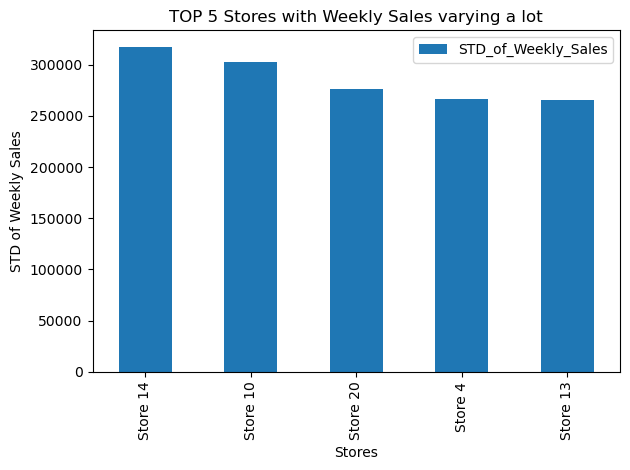

In [112]:
df_std.set_index('Store_Num').head(5).plot(kind = 'bar')

plt.xlabel("Stores")
plt.ylabel("STD of Weekly Sales")
plt.title("TOP 5 Stores with Weekly Sales varying a lot")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [113]:
df_std_yearly = walmart.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'std'}).reset_index()

df_std_yearly.columns = ['Store_Num', 'Year', 'STD_of_Weekly_Sales']
df_std_yearly.sort_values(by = 'STD_of_Weekly_Sales', inplace = True, ascending = False)

print("\nTOP 5 Store with Weekly Sales varying a lot - On Annual Basis\n")
df_std_yearly.head(5)


TOP 5 Store with Weekly Sales varying a lot - On Annual Basis



,Store_Num,Year,STD_of_Weekly_Sales
3,Store 10,2010,366059.644959
15,Store 14,2010,336759.641428
36,Store 20,2010,335859.866121
4,Store 10,2011,324215.949231
12,Store 13,2010,318291.323328


In [114]:
walmart.head()

,Store_Num,Date,Day,Month,Year,Holiday,Season,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,Store 1,2010-02-05,Fri,Feb,2010,no holiday,Winter,1643690.90,42.31,2.572,211.096358,8.106
1,Store 1,2010-02-12,Fri,Feb,2010,Super Bowl,Winter,1641957.44,38.51,2.548,211.242170,8.106
2,Store 1,2010-02-19,Fri,Feb,2010,no holiday,Winter,1611968.17,39.93,2.514,211.289143,8.106
3,Store 1,2010-02-26,Fri,Feb,2010,no holiday,Winter,1409727.59,46.63,2.561,211.319643,8.106
4,Store 1,2010-03-05,Fri,Mar,2010,no holiday,Winter,1554806.68,46.50,2.625,211.350143,8.106


In [115]:
df_day_wise=walmart.groupby(['Store_Num','Day']).aggregate({'Weekly_Sales':'sum'}).reset_index()
new_df_day_wise=['Store_Num','Day','Annual_Sale']
df_day_wise.columns=new_df_day_wise
df_day_wise.sort_values(by = 'Annual_Sale', inplace = True, ascending = False)
df_day_wise.tail(20)

,Store_Num,Day,Annual_Sale
43,Store 8,Fri,1.299512e+08
8,Store 17,Fri,1.277821e+08
39,Store 45,Fri,1.123953e+08
13,Store 21,Fri,1.081179e+08
17,Store 25,Fri,1.010612e+08
37,Store 43,Fri,9.056544e+07
6,Store 15,Fri,8.913368e+07
42,Store 7,Fri,8.159828e+07
36,Store 42,Fri,7.956575e+07
44,Store 9,Fri,7.778922e+07


In [136]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store_Num     6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Day           6435 non-null   object        
 3   Month         6435 non-null   object        
 4   Year          6435 non-null   object        
 5   Holiday       6435 non-null   object        
 6   Season        6435 non-null   object        
 7   Weekly_Sales  6435 non-null   float64       
 8   Temperature   6435 non-null   float64       
 9   Fuel_Price    6435 non-null   float64       
 10  CPI           6435 non-null   float64       
 11  Unemployment  6435 non-null   float64       
 12  Day_Num       6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 653.7+ KB


In [137]:
walmart['Day_Num']=(walmart['Day_Num']).astype('int64')

In [141]:
bins=[0,15,31]
slots=['1-15','16-31']
walmart['Business_Cycle']=pd.cut(walmart['Day_Num'],bins=bins,labels=slots)

In [142]:
walmart['Business_Cycle']

0        1-15
1        1-15
2       16-31
3       16-31
4        1-15
        ...  
6430    16-31
6431     1-15
6432     1-15
6433    16-31
6434    16-31
Name: Business_Cycle, Length: 6435, dtype: category
Categories (2, object): ['1-15' < '16-31']

In [157]:
walmart_Business=walmart.groupby('Business_Cycle').aggregate({'Weekly_Sales':'sum'}).reset_index()

In [158]:
walmart_Business.head()

,Business_Cycle,Weekly_Sales
0,1-15,3.301890e+09
1,16-31,3.435329e+09


In [159]:
df_top5_2010 = walmart.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2010 = df_top5_2010[df_top5_2010['Year'] == '2010']
df_top5_2010 = df_top5_2010.head(5)


print("\nTOP 5 Stores with Highest Weekly Sales in 2010\n")
df_top5_2010


TOP 5 Stores with Highest Weekly Sales in 2010



,Store_Num,Year,Weekly_Sales
15,Store 14,2010,1.054622e+08
36,Store 20,2010,1.017331e+08
99,Store 4,2010,9.568047e+07
33,Store 2,2010,9.527786e+07
12,Store 13,2010,9.527274e+07


In [160]:
df_top5_2011 = walmart.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2011 = df_top5_2011[df_top5_2011['Year'] == '2011']
df_top5_2011 = df_top5_2011.head(5)


print("\nTOP 5 Stores with Highest Weekly Sales in 2011\n")
df_top5_2011


TOP 5 Stores with Highest Weekly Sales in 2011



,Store_Num,Year,Weekly_Sales
100,Store 4,2011,1.110923e+08
37,Store 20,2011,1.098370e+08
16,Store 14,2011,1.060963e+08
13,Store 13,2011,1.045375e+08
4,Store 10,2011,9.891689e+07


In [161]:
df_top5_2012 = walmart.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2012 = df_top5_2012[df_top5_2012['Year'] == '2012']
df_top5_2012 = df_top5_2012.head(5)


print("\nTOP 5 Stores with Highest Weekly Sales in 2012\n")
df_top5_2012


TOP 5 Stores with Highest Weekly Sales in 2012



,Store_Num,Year,Weekly_Sales
101,Store 4,2012,92771189.24
38,Store 20,2012,89827709.38
14,Store 13,2012,86707455.02
35,Store 2,2012,81496695.37
5,Store 10,2012,78228616.94


In [170]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [171]:
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ["2010", "2011", "2012"])

fig.add_trace(go.Bar(x = df_top5_2010['Store_Num'],
                     y = df_top5_2010['Weekly_Sales'],
                     name = "2010"
                    ),
                    row = 1, col = 1)

fig.add_trace(go.Bar(x = df_top5_2011['Store_Num'],
                     y = df_top5_2011['Weekly_Sales'],
                     name = "2011"
                    ),
                    row = 1, col = 2)

fig.add_trace(go.Bar(x = df_top5_2012['Store_Num'],
                     y = df_top5_2012['Weekly_Sales'],
                     name = "2012"
                    ),
                    row = 1, col = 3)

fig['layout']['xaxis1'].update(dict(
                tickmode = 'array',
                tickvals = df_top5_2010['Store_Num'],
                ticktext = df_top5_2010['Store_Num'],
                )
            )

fig['layout']['xaxis2'].update(dict(
                tickmode = 'array',
                tickvals = df_top5_2011['Store_Num'],
                ticktext = df_top5_2011['Store_Num'],
                )
            )

fig['layout']['xaxis3'].update(dict(
                tickmode = 'array',
                tickvals = df_top5_2012['Store_Num'],
                ticktext = df_top5_2012['Store_Num'],
                )
            )

fig.update_layout(title_text = "Top 5 Stores Each Year", title_x = 0.5, width = 1000, height = 350)

fig.show()

In [ ]:
df_std_yearly = walmart.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'std'}).reset_index()

df_std_yearly.columns = ['Store_Num', 'Year', 'STD_of_Weekly_Sales']
df_std_yearly.sort_values(by = 'STD_of_Weekly_Sales', inplace = True, ascending = False)

print("\nTOP 5 Store with Weekly Sales varying a lot - On Annual Basis\n")
df_std_yearly

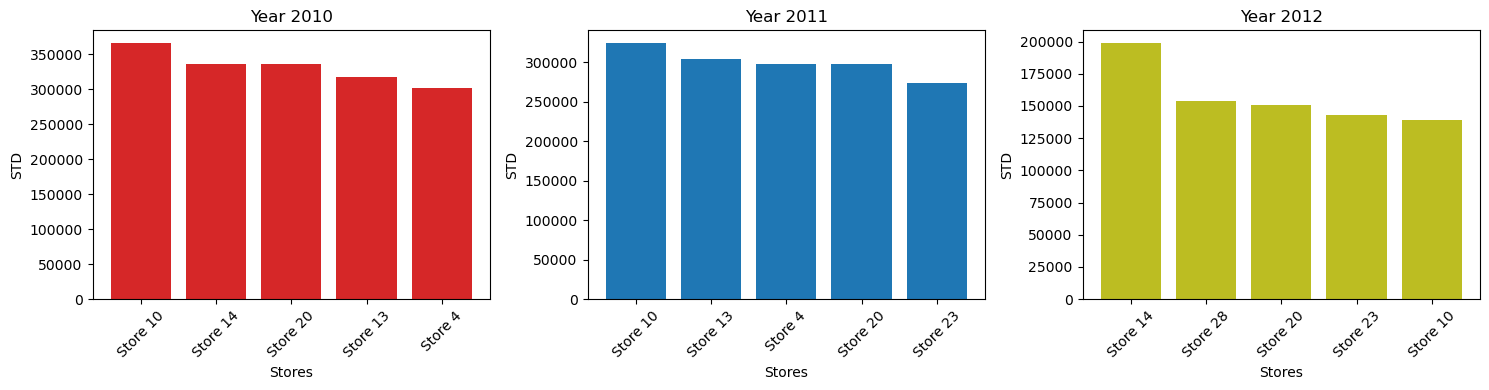

In [173]:
years = df_std_yearly.Year.unique()
years = sorted(years)

mycolors = ['tab:red', 'tab:blue', 'tab:olive'] #, 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']

# Plot
fig, ax = plt.subplots(1, len(years), sharey = False, figsize = (15, 4))

for i, j in enumerate(years):
    
    data = df_std_yearly[df_std_yearly['Year'] == j].sort_values(by = ['STD_of_Weekly_Sales'], ascending = False).head(5)
        
    ax[i].bar(data['Store_Num'], data['STD_of_Weekly_Sales'], color = mycolors[i])
    
    #labels
    ax[i].set(xlabel = 'Stores')
    ax[i].set(ylabel = 'STD')
    ax[i].set(title = 'Year ' + str(j))
    ax[i].tick_params(labelrotation = 45, axis = 'x')
    
    
plt.tight_layout()
plt.show()

In [177]:
walmart_stats = walmart.groupby(['Store_Num']).aggregate(
                                        Sum = ('Weekly_Sales','sum'), 
                                        Mean = ('Weekly_Sales','mean'), 
                                        STD = ('Weekly_Sales', 'std'),
                                        Variance = ('Weekly_Sales','var')
                                        )

In [178]:
walmart_stats

,Sum,Mean,STD,Variance
Store_Num,,,,
Store 1,2.224028e+08,1.555264e+06,155980.767761,2.433000e+10
Store 10,2.716177e+08,1.899425e+06,302262.062504,9.136235e+10
Store 11,1.939628e+08,1.356383e+06,165833.887863,2.750088e+10
Store 12,1.442872e+08,1.009002e+06,139166.871880,1.936742e+10
Store 13,2.865177e+08,2.003620e+06,265506.995776,7.049396e+10
Store 14,2.889999e+08,2.020978e+06,317569.949476,1.008507e+11
Store 15,8.913368e+07,6.233125e+05,120538.652043,1.452957e+10
Store 16,7.425243e+07,5.192477e+05,85769.680133,7.356438e+09
Store 17,1.277821e+08,8.935814e+05,112162.936087,1.258052e+10


In [179]:
walmart_stats['Coeff_of_Variation'] = (walmart_stats['STD'] / walmart_stats['Mean']) * 100

print("\nStats\n")
walmart_stats.head()


Stats



,Sum,Mean,STD,Variance,Coeff_of_Variation
Store_Num,,,,,
Store 1,2.224028e+08,1.555264e+06,155980.767761,2.433000e+10,10.029212
Store 10,2.716177e+08,1.899425e+06,302262.062504,9.136235e+10,15.913349
Store 11,1.939628e+08,1.356383e+06,165833.887863,2.750088e+10,12.226183
Store 12,1.442872e+08,1.009002e+06,139166.871880,1.936742e+10,13.792532
Store 13,2.865177e+08,2.003620e+06,265506.995776,7.049396e+10,13.251363


In [180]:
df_compareHolidays = walmart.groupby(['Holiday'], as_index = False).aggregate(
                                        Mean_of_Weekly_Sales = ('Weekly_Sales', 'mean'), 
                                        ) # ['Store_Num', 'Holiday']

print("\nAverage Sales in Holidays and No Holiday\n")
df_compareHolidays


Average Sales in Holidays and No Holiday



,Holiday,Mean_of_Weekly_Sales
0,Christmas,9.608331e+05
1,Labour Day,1.042427e+06
2,Super Bowl,1.079128e+06
3,Thanksgiving,1.471273e+06
4,no holiday,1.041256e+06


In [181]:
fig = px.pie(df_compareHolidays,
            values = 'Mean_of_Weekly_Sales',
            names = 'Holiday',
            #color = '',
            hole = 0.2,
            width = 550,
            height = 450,
            #hover_name = 'Mean',
            hover_data = ['Mean_of_Weekly_Sales'] #['Holiday', 'Mean_of_Weekly_Sales']
            )
fig.update_traces(textinfo = 'label + percent', insidetextfont_color = "black", showlegend = False,) # 'text + percent'
#fig.update_layout(paper_bgcolor = "#000")

fig.show()

In [182]:
df1 = walmart.copy()
df1.set_index('Date', inplace = True)

In [185]:
df1.columns

Index(['Store_Num', 'Day', 'Month', 'Year', 'Holiday', 'Season', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day_Num', 'Business_Cycle'], dtype='object')

In [186]:
df1.drop(columns = ['Month', 'Year', 'Season',], axis = 1, inplace = True)


In [187]:
df1

,Store_Num,Day,Holiday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Day_Num,Business_Cycle
Date,,,,,,,,,,
2010-02-05,Store 1,Fri,no holiday,1643690.90,42.31,2.572,211.096358,8.106,5,1-15
2010-02-12,Store 1,Fri,Super Bowl,1641957.44,38.51,2.548,211.242170,8.106,12,1-15
2010-02-19,Store 1,Fri,no holiday,1611968.17,39.93,2.514,211.289143,8.106,19,16-31
2010-02-26,Store 1,Fri,no holiday,1409727.59,46.63,2.561,211.319643,8.106,26,16-31
2010-03-05,Store 1,Fri,no holiday,1554806.68,46.50,2.625,211.350143,8.106,5,1-15
...,...,...,...,...,...,...,...,...,...,...
2012-09-28,Store 45,Fri,no holiday,713173.95,64.88,3.997,192.013558,8.684,28,16-31
2012-10-05,Store 45,Fri,no holiday,733455.07,64.89,3.985,192.170412,8.667,5,1-15
2012-10-12,Store 45,Fri,no holiday,734464.36,54.47,4.000,192.327265,8.667,12,1-15


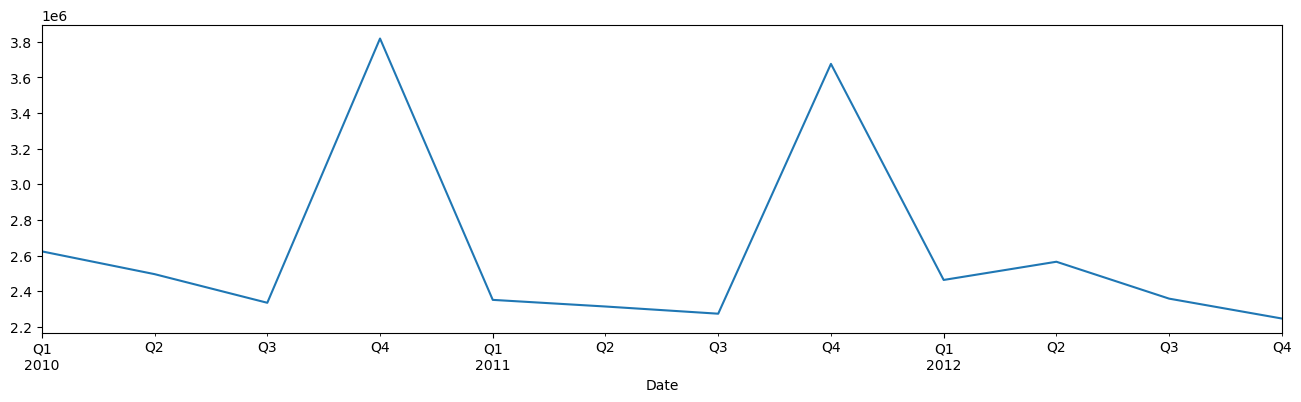

In [188]:
df1.resample(rule = 'QS').max()['Weekly_Sales'].plot(figsize = (16, 4))
plt.show()

In [189]:
df1.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Day_Num
Weekly_Sales,1.000000,-0.063810,0.009464,-0.072634,-0.106176,-0.017409
Temperature,-0.063810,1.000000,0.144982,0.176888,0.101158,0.026973
Fuel_Price,0.009464,0.144982,1.000000,-0.170642,-0.034684,0.028073
CPI,-0.072634,0.176888,-0.170642,1.000000,-0.302020,0.002684
Unemployment,-0.106176,0.101158,-0.034684,-0.302020,1.000000,-0.004233
Day_Num,-0.017409,0.026973,0.028073,0.002684,-0.004233,1.000000


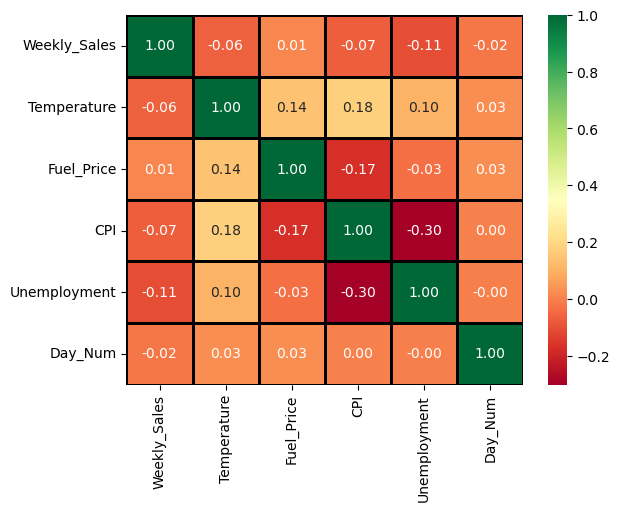

In [192]:
sns.heatmap(df1.corr(), annot = True, fmt = '.2f', cbar = True, cmap = "RdYlGn",  linecolor = 'black', linewidths = 2)
plt.show()

In [193]:
df_compareSeasons = walmart.groupby(['Season', 'Year'], as_index = False).aggregate(
                                        Mean = ('Weekly_Sales','mean'), 
                                        ) # ['Store_Num', Season', 'Year']

In [194]:
fig_compareSeasons = px.sunburst(df_compareSeasons, path = ['Season', 'Year'], # ['Store_Num', Season', 'Year']
                        values = 'Mean',
                        color = 'Mean',
                        color_continuous_scale = 'blues',
                        maxdepth = -1)

fig_compareSeasons.update_layout(margin = dict(t = 10, b = 10, r = 10, l = 10),
                                showlegend = False,
                                plot_bgcolor = 'black',
                                )
                  
fig_compareSeasons.show()

In [196]:
df_compareSeasons1 = walmart.groupby(['Business_Cycle', 'Year'], as_index = False).aggregate(
                                        Mean = ('Weekly_Sales','mean'), 
                                        ) # ['Store_Num', Season', 'Year']

In [197]:
fig_compareSeasons1 = px.sunburst(df_compareSeasons, path = ['Business_Cycle', 'Year'], # ['Store_Num', Season', 'Year']
                        values = 'Mean',
                        color = 'Mean',
                        color_continuous_scale = 'blues',
                        maxdepth = -1)

fig_compareSeasons1.update_layout(margin = dict(t = 10, b = 10, r = 10, l = 10),
                                showlegend = False,
                                plot_bgcolor = 'black',
                                )
                  
fig_compareSeasons1.show()